In [1]:
!pip3 install keras

    100% |████████████████████████████████| 378kB 2.2MB/s ta 0:00:01
    100% |████████████████████████████████| 276kB 2.0MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/62/20/4d43e141b5bc426ba38274933ef8e76e85c7adea2c321ecf9ebf7421cedf/numpy-1.18.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/60/06/cafdd44889200e5438b897388f3075b52a8ef01f28a17366d91de0fa2d05/h5py-2.10.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.

In [6]:
!pip3 install scikit-learn

  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 7.1MB 271kB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/62/20/4d43e141b5bc426ba38274933ef8e76e85c7adea2c321ecf9ebf7421cedf/numpy-1.18.1-cp36-cp36m-manylinux1_x86_64.whl
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 296kB 4.1MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl


In [8]:
!pip3 install matplotlib opencv-python 

  Using cached https://files.pythonhosted.org/packages/e6/fc/5889757c4c70c552f56fddc8fbdcab565475686cdebdfa1806a9d54cd53b/matplotlib-3.2.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/68/c5/09a1b82f940805c2cee30c3c42786651edcfd0710a0283eb09c6bc959340/opencv_python-4.2.0.32-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f8/a1/5742b56282449b1c0968197f63eae486eca2c35dcd334bab75ad524e0de1/kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5d/bc/1e58593167fade7b544bfe9502a26dc860940a79ab306e651e7f13be68c2/pyparsing-2.4.6-py2.py3-none-any.w

In [334]:
import math
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.contrib.keras import backend
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from PIL import Image

In [2]:
path = 'flowers'

In [3]:
imgs =[]
for i in os.listdir(path):
    for j in os.listdir((os.path.join(path, i))):
        imgs.append((os.path.join(i,j)))

In [4]:
imgs[0]

'sunflower/4914793782_d0ea760791.jpg'

In [5]:
imgs[0].find('/')

9

In [6]:
labels = []
for i in imgs:
    label = i[:(i.find('/'))]
    labels.append(label)

In [7]:
data = []
for i in imgs:
    img = cv2.imread(os.path.join(path, i))
    try:
        img = cv2.resize(img, (150,150))
        img = np.array(img)
        data.append(img)
    except Exception:
        print(os.path.join(path, i))

In [8]:
data[1000].shape

(150, 150, 3)

In [9]:
%matplotlib inline

Text(0.5, 1.0, 'sunflower')

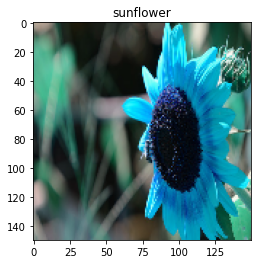

In [10]:
plt.imshow(data[233])
plt.title('{}'.format(labels[233]))

In [11]:
v = []
for i in labels:
    if i not in v:
        v.append(i)
print(v)

['sunflower', 'tulip', 'rose', 'dandelion', 'daisy']


In [12]:
labels = list(labels)

In [13]:
v = list(v)

In [14]:
for i,j in enumerate(labels):
    for index, item in enumerate(v):
        if j == item:
            labels[i] = index 

In [15]:
labels[1000:1020]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [16]:
labels = np.array(labels)

In [17]:
encoded = to_categorical(labels)

In [18]:
encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [19]:
encoded.shape

(4322, 5)

In [20]:
data[1].shape

(150, 150, 3)

In [21]:
data = [np.array(i) for i in data]

In [22]:
data[-5]

array([[[138, 138, 138],
        [162, 162, 162],
        [166, 166, 166],
        ...,
        [167, 167, 167],
        [163, 163, 163],
        [135, 135, 135]],

       [[180, 180, 180],
        [220, 220, 220],
        [230, 230, 230],
        ...,
        [230, 230, 230],
        [217, 217, 217],
        [177, 177, 177]],

       [[188, 188, 188],
        [231, 231, 231],
        [239, 239, 239],
        ...,
        [241, 241, 241],
        [229, 229, 229],
        [186, 186, 186]],

       ...,

       [[211, 211, 211],
        [230, 230, 230],
        [239, 239, 239],
        ...,
        [240, 240, 240],
        [228, 228, 228],
        [213, 213, 213]],

       [[203, 203, 203],
        [219, 219, 219],
        [228, 228, 228],
        ...,
        [231, 231, 231],
        [217, 217, 217],
        [207, 207, 207]],

       [[196, 196, 196],
        [205, 205, 205],
        [216, 216, 216],
        ...,
        [212, 212, 212],
        [205, 205, 205],
        [199, 199, 199]]

In [23]:
data = [i/255 for i in data]

In [24]:
data[-5]

array([[[0.54117647, 0.54117647, 0.54117647],
        [0.63529412, 0.63529412, 0.63529412],
        [0.65098039, 0.65098039, 0.65098039],
        ...,
        [0.65490196, 0.65490196, 0.65490196],
        [0.63921569, 0.63921569, 0.63921569],
        [0.52941176, 0.52941176, 0.52941176]],

       [[0.70588235, 0.70588235, 0.70588235],
        [0.8627451 , 0.8627451 , 0.8627451 ],
        [0.90196078, 0.90196078, 0.90196078],
        ...,
        [0.90196078, 0.90196078, 0.90196078],
        [0.85098039, 0.85098039, 0.85098039],
        [0.69411765, 0.69411765, 0.69411765]],

       [[0.7372549 , 0.7372549 , 0.7372549 ],
        [0.90588235, 0.90588235, 0.90588235],
        [0.9372549 , 0.9372549 , 0.9372549 ],
        ...,
        [0.94509804, 0.94509804, 0.94509804],
        [0.89803922, 0.89803922, 0.89803922],
        [0.72941176, 0.72941176, 0.72941176]],

       ...,

       [[0.82745098, 0.82745098, 0.82745098],
        [0.90196078, 0.90196078, 0.90196078],
        [0.9372549 , 0

In [303]:
x_train,x_test,y_train,y_test=train_test_split(data,encoded,test_size=0.05, random_state = 20)

In [304]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [305]:
x_train = x_train.reshape(x_train.shape[0], 150, 150, 3)
x_test = x_test.reshape(x_test.shape[0], 150,150,3)

In [306]:
print(y_train[1])
print(y_train[-1])

[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]


In [307]:
del model

In [308]:
# 5. Định nghĩa model
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Thêm Conv layer:
model.add(Conv2D(64, (5,5), activation='relu'))
# Flatten layer chuyển từ tensor sang vector

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.6))
model.add(Dense(units=5, activation='softmax'))

In [309]:
opt = Adam(lr=1e-4)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [310]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 32, 32, 64)        51264     
_________________________________________________________________
flatten_25 (Flatten)         (None, 65536)             0         
_________________________________________________________________
dense_44 (Dense)             (None, 64)              

In [311]:
H = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test))

Train on 4105 samples, validate on 217 samples
Epoch 1/30
4105/4105 [==============================] - 53s 13ms/step - loss: 1.4960 - accuracy: 0.3206 - val_loss: 1.3171 - val_accuracy: 0.4286
Epoch 2/30
4105/4105 [==============================] - 49s 12ms/step - loss: 1.3602 - accuracy: 0.4058 - val_loss: 1.2179 - val_accuracy: 0.5207
Epoch 3/30
4105/4105 [==============================] - 47s 11ms/step - loss: 1.2949 - accuracy: 0.4526 - val_loss: 1.1779 - val_accuracy: 0.5622
Epoch 4/30
4105/4105 [==============================] - 48s 12ms/step - loss: 1.2504 - accuracy: 0.4760 - val_loss: 1.1513 - val_accuracy: 0.5253
Epoch 5/30
4105/4105 [==============================] - 47s 11ms/step - loss: 1.2084 - accuracy: 0.5011 - val_loss: 1.0840 - val_accuracy: 0.5945
Epoch 6/30
4105/4105 [==============================] - 47s 11ms/step - loss: 1.1613 - accuracy: 0.5223 - val_loss: 1.0185 - val_accuracy: 0.6175
Epoch 7/30
4105/4105 [==============================] - 49s 12ms/step - loss:

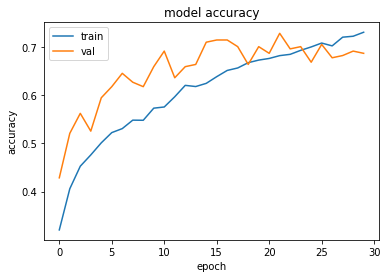

In [312]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

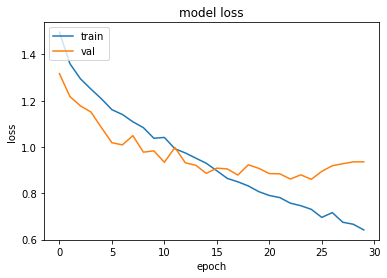

In [313]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [314]:
y_pred = model.predict_classes(x_test)

In [315]:
y_res = [np.argmax(i) for i in y_test]

In [316]:
y_res = np.array(y_res)

In [317]:
y_res

array([3, 2, 0, 2, 1, 4, 3, 3, 3, 1, 3, 2, 4, 3, 3, 4, 4, 3, 2, 2, 3, 0,
       1, 3, 4, 4, 4, 0, 0, 1, 1, 3, 2, 0, 1, 0, 0, 3, 0, 0, 0, 1, 1, 1,
       0, 0, 4, 4, 3, 3, 1, 1, 1, 2, 1, 0, 0, 2, 4, 3, 3, 0, 1, 3, 1, 2,
       1, 2, 0, 0, 3, 3, 4, 2, 3, 0, 4, 1, 3, 4, 4, 0, 0, 1, 1, 1, 4, 0,
       2, 1, 1, 3, 1, 3, 3, 1, 1, 3, 2, 3, 3, 3, 0, 0, 4, 1, 0, 1, 2, 4,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 4, 3, 1, 2, 4, 3, 0, 1, 3, 2, 1, 1, 4,
       2, 0, 3, 2, 4, 3, 1, 4, 1, 3, 3, 4, 4, 1, 2, 4, 2, 3, 2, 1, 3, 0,
       4, 0, 2, 3, 4, 3, 3, 3, 2, 4, 3, 3, 4, 0, 4, 1, 1, 2, 3, 0, 0, 0,
       4, 2, 3, 1, 1, 3, 1, 2, 2, 2, 1, 2, 3, 0, 1, 3, 4, 3, 0, 0, 4, 4,
       4, 2, 1, 4, 1, 1, 4, 2, 3, 0, 4, 1, 1, 1, 3, 3, 3, 0, 2])

In [318]:
print("Accuracy :{:.2f}".format(100*accuracy_score(y_res, y_pred)) + '%')

Accuracy :68.66%


In [398]:
test_path = 'test'

In [399]:
for i in os.listdir(test_path):
    print(i)

daisy3.jpg
dandelion1.jpg
sunflower.jpg
sunflower2.jpg
rose1.jpg
tulip.jpg
dandelion2.jpg
daisy1.jpg
tulip3.jpg
tulip2.jpg
rose.jpg
tulip1.jpg
sunflower3.jpg
sunflower1.jpg
rose2.jpg
daisy2.jpg
dandelion.jpg
daisy.jpg
dandelion3.jpg
rose3.jpg


In [400]:
test_imgs = []
show_imgs = []
for i in os.listdir(test_path):
    print(i)
    ims = Image.open(os.path.join(test_path, i))
    #ims = ims.resize((150,150))
    show_imgs.append(ims)
    img = cv2.imread(os.path.join(test_path, i))
    img = cv2.resize(img,(150,150))
    test_imgs.append(img)

daisy3.jpg
dandelion1.jpg
sunflower.jpg
sunflower2.jpg
rose1.jpg
tulip.jpg
dandelion2.jpg
daisy1.jpg
tulip3.jpg
tulip2.jpg
rose.jpg
tulip1.jpg
sunflower3.jpg
sunflower1.jpg
rose2.jpg
daisy2.jpg
dandelion.jpg
daisy.jpg
dandelion3.jpg
rose3.jpg


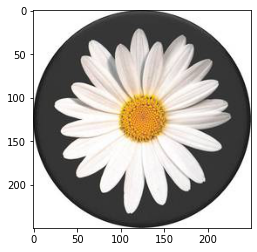

In [401]:
plt.imshow(show_imgs[0])

In [402]:
test_imgs = [i/255 for i in test_imgs]

In [403]:
test_imgs = np.array(test_imgs)

In [404]:
test_imgs[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [406]:
test_labels = [
    'daisy',
    'dandelion',
    'sunflower',
    'sunflower',
    'rose',
    'tulip',
    'dandelion',
    'daisy',
    'tulip',
    'tulip',
    'rose',
    'tulip',
    'sunflower',
    'sunflower',
    'rose',
    'daisy',
    'dandelion',
    'daisy',
    'dandelion',
    'rose'
    ]

In [407]:
for index, item in enumerate(test_labels):
    for i, j in enumerate (v):
        if item == j:
            test_labels[index] = i

In [408]:
test_labels

[4, 3, 0, 0, 2, 1, 3, 4, 1, 1, 2, 1, 0, 0, 2, 4, 3, 4, 3, 2]

In [409]:
y_pred1 = model.predict_classes(test_imgs)

In [410]:
y_pred1 = list(y_pred1)

In [411]:
print("Accuracy :{:.2f}".format(100*accuracy_score(test_labels, y_pred1)) + '%')

Accuracy :90.00%


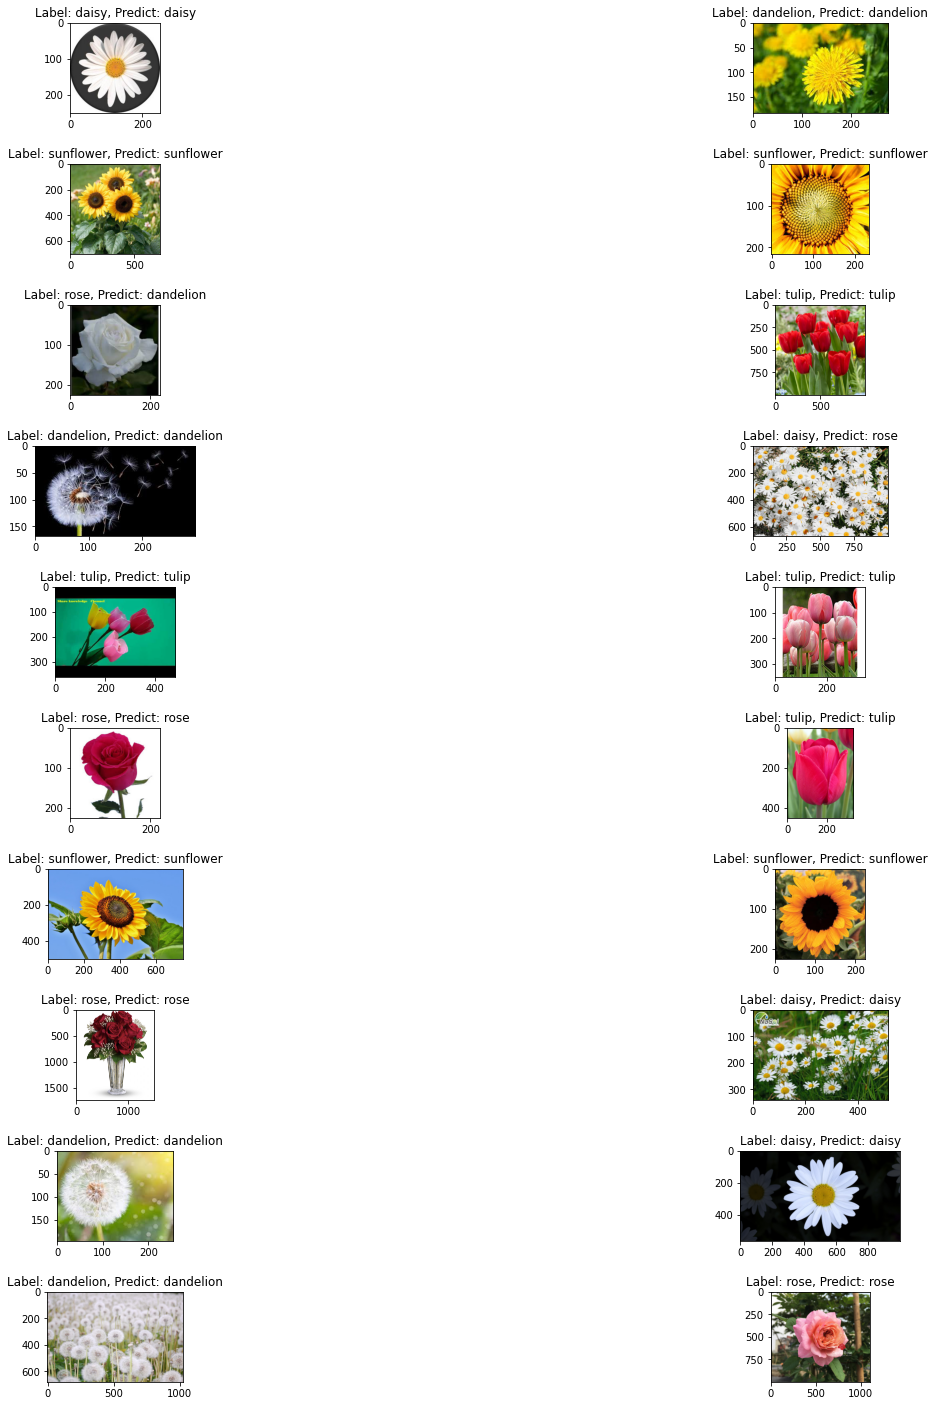

In [412]:
fig,ax=plt.subplots(math.ceil(len(test_imgs) / 2),2)
fig.set_size_inches(20,20)
fig.tight_layout(pad=3.0)
count  = 0
try:
    for i in range(math.ceil(len(test_imgs) / 2)):
        for j in range(2):
            ax[i][j].imshow(show_imgs[count])
            ax[i][j].set_title('Label: {}, Predict: {}'.format(v[test_labels[count]], v[y_pred1[count]]))
            count += 1
except IndexError:
    pass